  0	[(0, 1.0)]	1.00000
  1	[(-1, 0.499), (1, 0.501)]	1.00000
  2	[(-2, 0.25), (0, 0.495), (2, 0.255)]	1.00000
  3	[(-3, 0.12), (-1, 0.382), (1, 0.369), (3, 0.128)]	1.00000
  4	[(-4, 0.061), (-2, 0.262), (0, 0.363), (2, 0.245), (4, 0.069)]	1.00000
  5	[(-5, 0.03), (-3, 0.16), (-1, 0.31), (1, 0.317), (3, 0.151), (5, 0.032)]	1.00000
  6	[(-6, 0.016), (-4, 0.095), (-2, 0.227), (0, 0.328), (2, 0.229), (4, 0.086), (6, 0.019)]	1.00000
  7	[(-7, 0.005), (-5, 0.06), (-3, 0.152), (-1, 0.285), (1, 0.283), (3, 0.148), (5, 0.055), (7, 0.01)]	1.00000
  8	[(-8, 0.002), (-6, 0.033), (-4, 0.106), (-2, 0.227), (0, 0.279), (2, 0.209), (4, 0.109), (6, 0.03), (8, 0.005)]	1.00000
  9	[(-9, 0.001), (-7, 0.022), (-5, 0.065), (-3, 0.174), (-1, 0.247), (1, 0.237), (3, 0.164), (5, 0.067), (7, 0.019), (9, 0.004)]	1.00000
 10	[(-10, 0.0), (-8, 0.009), (-6, 0.045), (-4, 0.121), (-2, 0.208), (0, 0.249), (2, 0.195), (4, 0.117), (6, 0.043), (8, 0.012), (10, 0.002)]	1.00000
 11	[(-9, 0.005), (-7, 0.027), (-5, 0.085), (

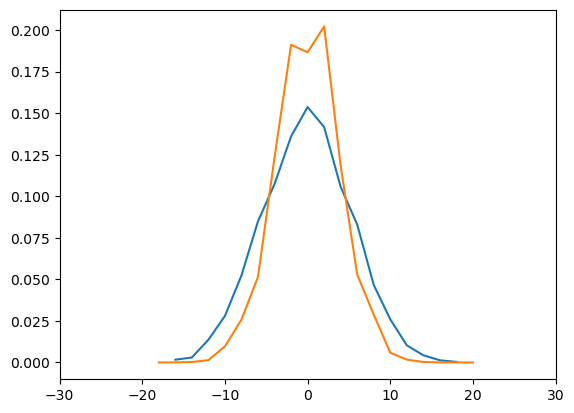

In [29]:
import random
import collections
import matplotlib.pyplot as plt

def count_values_classic(input_list, num_walkers):
    """
    Get the weighted counts for unique elements in an input list using a given power and number of walkers.

    Arenas:
        input_list (List[int]): A list of integers representing data points.
        num_walkers (int): Number of walkers used to calculate weights.
        power (int): The exponent applied to the counts for calculating weighted values.

    Returns:
        List[Tuple[int, float]]: A sorted list of tuples containing unique elements from input_list and their normalized weighted counts.

    Example usage:
    ```python
    data = [1, 2, 3, 4, 5]
    walkers = 2
    power = 2

    print(get_counts(data, walkers, power)) # [(1, 0.06666666666666667), (2, 0.13333333333333333), ...]
    ```
    """
    counter = collections.Counter(input_list)
    norm = sum([counter[n] for n in counter])
    return sorted((val, counter[val]/norm) for val in set(input_list))

def count_values_qm(input_list, num_walkers):
    """
    Get the weighted counts for unique elements in an input list using a given power and number of walkers.

    Arenas:
        input_list (List[int]): A list of integers representing data points.
        num_walkers (int): Number of walkers used to calculate weights.
        power (int): The exponent applied to the counts for calculating weighted values.

    Returns:
        List[Tuple[int, float]]: A sorted list of tuples containing unique elements from input_list and their normalized weighted counts.

    Example usage:
    ```python
    data = [1, 2, 3, 4, 5]
    walkers = 2
    power = 2

    print(get_counts(data, walkers, power)) # [(1, 0.06666666666666667), (2, 0.13333333333333333), ...]
    ```
    """
    wave_vectors=((0,1),(1,0),(-1,0),(0,-1))
    counter = collections.Counter(input_list)
    norm = sum([counter[n]**2 for n in counter])
    return sorted((val, counter[val]**2/norm) for val in set(input_list))

def random_walk_classic(**kwargs):
    """
    1-Dimensional Random Walk simulation.

    :param num_steps: The number of steps to simulate (default: 100)
    :param start: Starting position (default: 0)
    :param num_walkers: Number of walkers (default: 100)
    :return: A list containing the random walk's coordinates in the format [x, index].
    The steps of the walk are strings num_walker + 1 long where the first element is the step index
    """

    # Initialize walk with starting position
    num_steps=kwargs.get("num_steps",4)
    start=kwargs.get("start",0) 
    num_walkers=kwargs.get("num_walkers",10000)

    walk = [[0]+[ start for _ in range(num_walkers)]]

    for k in range(1, num_steps + 1):
        #start a new step
        walk.append([k])
        for walker in range(1,num_walkers+1):
            # Append new position (x and index) the current step of the walk is in walk[-1]
            walk[-1].append(walk[-2][walker] + random.choice([-1, 1]))

    return walk

def random_walk_qm(**kwargs):
    """
    1-Dimensional Random Walk simulation.

    :param num_steps: The number of steps to simulate (default: 100)
    :param start: Starting position (default: 0)
    :param num_walkers: Number of walkers (default: 100)
    :return: A list containing the random walk's coordinates in the format [x, index].
    The steps of the walk are strings num_walker + 1 long where the first element is the step index. 
    The other elements are lists with [node index, phase] phase is between 0 and 3
    """

    # Initialize walk with starting phase
    num_steps=kwargs.get("num_steps",4)
    start=kwargs.get("start",0) 
    num_walkers=kwargs.get("num_walkers",10000)

    walk = [[0]+[ start for _ in range(num_walkers)]]

    for k in range(1, num_steps + 1):
        #start a new step
        walk.append([k])
        for walker in range(1,num_walkers+1):
            # Append new position (x and index) the current step of the walk is in walk[-1]
            step=random.choice([-1, 1])
            walk[-1].append([walk[-2][walker][0] + step,(walk[-2][walker][1] + step)%4])
    return walk

# Example usage:
num_walkers=3000
num_steps=30
for step in random_walk_classic(num_steps=num_steps,start=0,num_walkers=num_walkers):
    RW=count_values_classic(step[1:],num_walkers)
    P_sum=sum([node[1] for node in RW]) #check if sum of prob is 1
    rounded_RW = [(k, round(v,3)) for k, v in RW]
    print("{:3}\t{}\t{:1.5f}".format(step[0],rounded_RW,P_sum))

# unzip the list of tuple (value, counts) in two lists
values,counts=zip(*RW)

for step in random_walk_qm(num_steps=num_steps,start=0,num_walkers=num_walkers):
    qm_RW=count_values_qm(step[1:],num_walkers)
    P_sum=sum([node[1] for node in qm_RW])
    # Round qm_RW to limit number of digits
    rounded_QM_RW = [(k, round(v,3)) for k, v in qm_RW]
    print("{:3}\t{}\t{:1.5f}".format(step[0],rounded_QM_RW,P_sum))

# unzip the list of tuple (value, counts) in two lists
values_qm,counts_qm=zip(*qm_RW)


plt.plot(values, counts)
plt.plot(values_qm, counts_qm)
plt.xlim(-(num_steps), num_steps)
plt.show()


In [37]:
print(random_walk_qm(num_walkers=4))

[[0, [0, 0], [0, 0], [0, 0], [0, 0]], [1, [-1, -1], [-1, -1], [-1, -1], [1, 1]], [2, [0, 0], [-2, -2], [0, 0], [2, 2]], [3, [1, 1], [-1, -1], [1, 1], [1, 1]], [4, [2, 2], [-2, -2], [0, 0], [2, 2]]]


In [33]:
def random_walk_qm(**kwargs):
    """
    1-Dimensional Random Walk simulation.

    :param num_steps: The number of steps to simulate (default: 100)
    :param start: Starting position (default: 0)
    :param num_walkers: Number of walkers (default: 100)
    :return: A list containing the random walk's coordinates in the format [x, index].
    The steps of the walk are strings num_walker + 1 long where the first element is the step index. 
    The other elements are lists with [node index, phase] phase is between 0 and 3
    """

    # Initialize walk with starting phase
    num_steps=kwargs.get("num_steps",4)
    start=kwargs.get("start",0) 
    num_walkers=kwargs.get("num_walkers",100)

    walk = [[0]+[ [start,start] for _ in range(num_walkers)]]
    for k in range(1, num_steps + 1):
        #start a new step
        walk.append([k])
        for walker in range(1,num_walkers+1):
            # Append new position (x and index) the current step of the walk is in walk[-1]
            step=random.choice([-1, 1])
            walk[-1].append([walk[-2][walker][0] + step,(walk[-2][walker][1] + step)])
    return walk


num_walkers=10
num_steps=10
#list of possible wavevector to map
    
random_walk_qm(num_steps=num_steps,start=0,num_walkers=num_walkers)

[[0,
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0]],
 [1,
  [1, 1],
  [-1, -1],
  [-1, -1],
  [1, 1],
  [-1, -1],
  [-1, -1],
  [-1, -1],
  [1, 1],
  [1, 1],
  [1, 1]],
 [2,
  [2, 2],
  [-2, -2],
  [0, 0],
  [2, 2],
  [0, 0],
  [0, 0],
  [-2, -2],
  [2, 2],
  [2, 2],
  [2, 2]],
 [3,
  [1, 1],
  [-3, -3],
  [-1, -1],
  [1, 1],
  [-1, -1],
  [1, 1],
  [-3, -3],
  [3, 3],
  [1, 1],
  [1, 1]],
 [4,
  [2, 2],
  [-4, -4],
  [0, 0],
  [2, 2],
  [0, 0],
  [2, 2],
  [-2, -2],
  [4, 4],
  [2, 2],
  [2, 2]],
 [5,
  [1, 1],
  [-5, -5],
  [-1, -1],
  [1, 1],
  [1, 1],
  [1, 1],
  [-1, -1],
  [5, 5],
  [3, 3],
  [1, 1]],
 [6,
  [2, 2],
  [-6, -6],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [6, 6],
  [4, 4],
  [2, 2]],
 [7,
  [1, 1],
  [-5, -5],
  [-1, -1],
  [1, 1],
  [1, 1],
  [-1, -1],
  [-1, -1],
  [5, 5],
  [3, 3],
  [3, 3]],
 [8,
  [0, 0],
  [-4, -4],
  [-2, -2],
  [0, 0],
  [0, 0],
  [-2, -2],
  [0, 0],
  [6, 6],
  [4, 4],
  [4, 4]]

In [7]:
wave_vectors=((0,1),(1,0),(-1,0),(0,-1))
for _ in range(10):
    index=random.randint(0,50)
    print(index,phases[index%(len(phases))])
    

16 (0, 1)
7 (0, -1)
45 (1, 0)
9 (1, 0)
6 (-1, 0)
40 (0, 1)
25 (1, 0)
34 (-1, 0)
14 (-1, 0)
20 (0, 1)


In [17]:
print(random_walk(num_steps=num_steps,start=0,num_walkers=num_walkers)[-1])

[30, 28, 28, 28, 28, 26, 24, 20, 24, 22, 24, 20, 14, 16, 18, 20, 16, 18, 12, 10, 8, 14, 2, 10, 14, 2, 8, 6, -8, -4, -4, 2, -10, 8, -2, 8, 6, 8, 0, -14, 12, 10, -4, -8, -12, -2, -2, -2, -8, 8, 0, 0, 0, 6, -8, -2, -8, -2, -4, -6, -6, -2, 4, 2, 4, -2, -4, 2, -6, 6, 6, 12, 0, -2, -4, 6, 10, 8, -2, -4, 8, -10, 0, -6, -2, 4, -16, -2, 8, 2, -10, -6, -14, 0, -4, 8, 2, 4, 6, 8, 4, -6, -2, 2, 6, 2, 6, 0, 4, -4, 12, -2, -4, 0, -4, 0, -2, 0, 2, 2, 6, 4, 0, -4, 2, -2, 2, -4, -4, -6, 8, 4, -10, -14, 2, 2, -4, 2, 2, -2, 0, 2, -6, -2, -4, -8, -8, 6, 0, 6, -10, 4, 10, 4, -2, -4, 0, -2, -4, 4, -6, -2, 2, -8, -8, 2, -4, -8, 2, 0, 0, 14, 0, 14, 8, 2, 4, 0, 6, -6, -8, -6, -2, 6, -4, -6, -4, -4, 0, -4, -8, -8, 4, -4, 2, 0, 2, 0, -2, 2, -8, 2, 6, 0, 8, 2, -8, 6, -4, 6, 6, 0, 2, 4, -2, 2, 4, -6, -6, -8, 8, 10, 4, -4, -12, 6, -2, -2, -2, -4, -8, 6, -2, 16, 6, 6, -6, 2, 4, -6, -12, 10, -8, 0, 6, 0, 4, -10, -6, 2, -6, -10, 0, -6, 0, 4, 4, 0, 6, 4, 6, -10, 10, -6, 0, -4, -4, -4, 4, 2, -4, -4, 0, 2, -4, -6, 6, -8,